# Basic EDA

In [30]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring clear visuals for analysis
plt.style.use("ggplot")

# Load Dataset
print("Loading dataset...")
df = pd.read_excel('/home/ak/Desktop/excelr pro//Churn (1).xlsx')
print("Dataset loaded successfully. Checking basic structure...")

# Preview data structure
display(df.head())

# Display dataset info
df.info()

# Identify Categorical & Numerical Columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nFeature Classification:")
print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical Columns ({len(numerical_cols)}): {numerical_cols}")

# Cardinality of Categorical Columns
print("\nCardinality of Categorical Columns:")
for col in categorical_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

Loading dataset...
Dataset loaded successfully. Checking basic structure...


,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

Basic EDA shows us that:
 - Big data techniques are not required.
 - 'Unnamed 0' is a dummy index column and can be dropped
 - Target column is 'churn'
 - 'day.charge' and 'eve.mins' are actually numerical columns classified as categorical due to string 'Nan' values
 - Within categorical columns, low cardinality columns (< 5) will be one-hot encoded and high-cardinality columns (>= 5) will be label-encoded
 - We will prefer Min Max Scaler so that the columns with cardinality = 2 will remain unaffected


# Data Cleaning & Visualisation

In [31]:
# Drop dummy index column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
    print("Dropped 'Unnamed: 0' column.")

# Convert 'day.charge' and 'eve.mins' to numerical
for col in ['day.charge', 'eve.mins']:
    if col in categorical_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"Converted '{col}' to numerical while retaining NaN values.")
        categorical_cols.remove(col)
        numerical_cols.append(col)

# Print percentage of NaN values in 'day.charge' and 'eve.mins'
nan_percentage_corrected = df[['day.charge', 'eve.mins']].isnull().mean() * 100
print("\nPercentage of NaN values in 'day.charge' and 'eve.mins' (before imputation):")
print(nan_percentage_corrected)

Dropped 'Unnamed: 0' column.
Converted 'day.charge' to numerical while retaining NaN values.
Converted 'eve.mins' to numerical while retaining NaN values.

Percentage of NaN values in 'day.charge' and 'eve.mins' (before imputation):
day.charge    0.14
eve.mins      0.48
dtype: float64


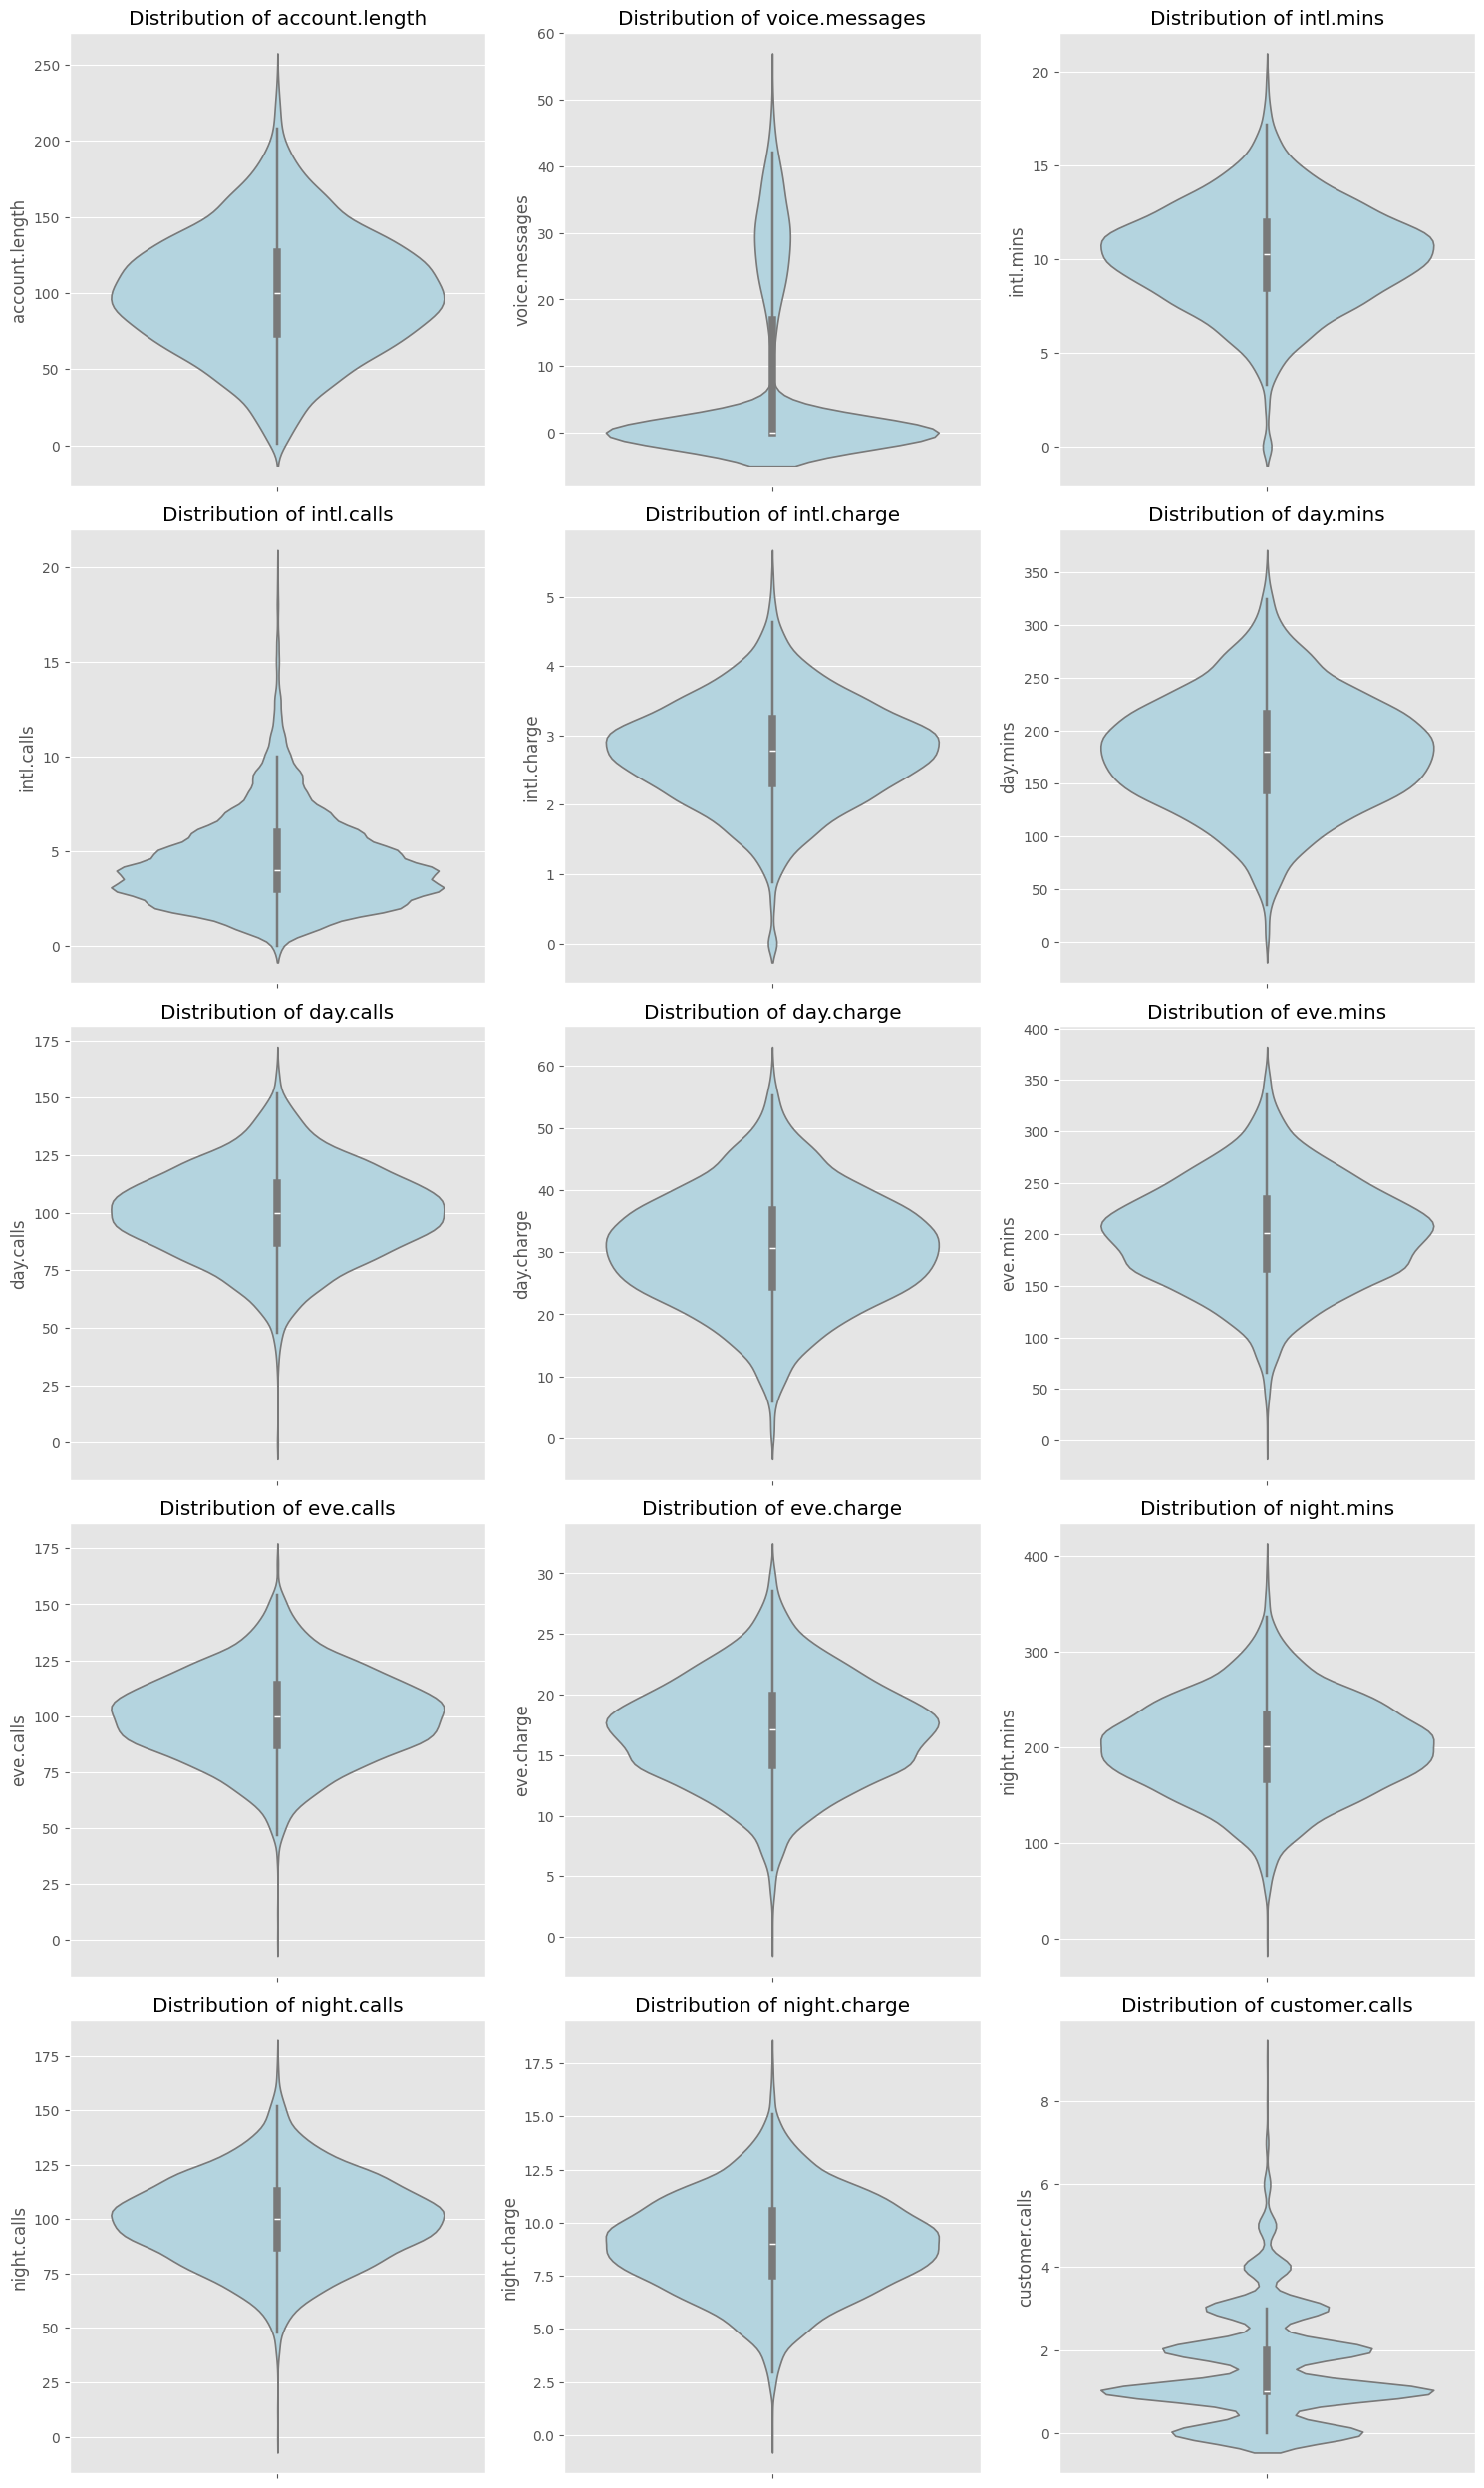

In [32]:
# Set up figure and axes
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features = len(num_cols)
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))

# Flatten axes for easy iteration
axes = axes.flatten()

# Create violin plots for each numerical column with a box plot inside
for i, col in enumerate(num_cols):
    sns.violinplot(y=df[col], ax=axes[i], inner="box", color="lightblue", linewidth=1.2)
    axes[i].set_title(f"Distribution of {col}")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Distributions of missing value columns are highly symmetrical with no skewness. And the percentage of missing values is less than 1%. Therefore we can safely use mean imputation

In [33]:
# Applying Mean Imputation for 'day.charge' and 'eve.mins'
for col in ['day.charge', 'eve.mins']:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)
    print(f"Imputed missing values in '{col}' using mean: {mean_value:.2f}")

print("\nFinal Integrity Check:")
print(f"Dataset shape: {df.shape}")  # Confirm no unexpected column loss
print("Missing values per column:")
print(df.isnull().sum().sum())  # Ensure all missing values are handled

# Confirm data types after all modifications
print("\nData Types After Preprocessing:")
print(df.dtypes.value_counts())

# Confirm the numerical and categorical column lists
print("\nUpdated Feature Classification:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical Columns ({len(numerical_cols)}): {numerical_cols}")

Imputed missing values in 'day.charge' using mean: 30.65
Imputed missing values in 'eve.mins' using mean: 200.58

Final Integrity Check:
Dataset shape: (5000, 20)
Missing values per column:
0

Data Types After Preprocessing:
float64    8
int64      7
object     5
dtype: int64

Updated Feature Classification:
Categorical Columns (5): ['state', 'area.code', 'voice.plan', 'intl.plan', 'churn']
Numerical Columns (15): ['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls']


# Feature Engineering

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from scipy.stats import norm
from scipy.stats.mstats import winsorize

# Identify low and high cardinality categorical columns
low_cardinality_cols = ['voice.plan', 'intl.plan', 'churn', 'area.code'] # These have < 5 unique values each
high_cardinality_cols = ['state'] # These have > 5 unique values each
print("Encoding Strategy:")
print(f"One-Hot Encoding: {low_cardinality_cols}")
print(f"Label Encoding: {high_cardinality_cols}")

# Identify numerical columns for transformation (excluding categorical ones)
numerical_cols = [col for col in df.columns if col not in low_cardinality_cols + high_cardinality_cols]
print(f"\nNumerical Columns for Transformation: {numerical_cols}")

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in high_cardinality_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method="yeo-johnson")
df[numerical_cols] = pt.fit_transform(df[numerical_cols])
print("\nApplied Yeo-Johnson Transformation to normalize distributions.")

# Copy of Dataframe to Retain Outliers
df_2 = df.copy()

# Apply Winsorization (3-Sigma Rule to cap extreme outliers)
# Compute the percentile equivalents of the 3-Sigma Rule
lower_percentile = norm.cdf(-3)  # ~0.00135 (0.135%)
upper_percentile = norm.cdf(3)   # ~0.99865 (99.865%)
# Apply Winsorization based on computed percentiles
for col in numerical_cols:
    df[col] = winsorize(df[col], limits=[1 - upper_percentile, lower_percentile])  # Winsorizing at 3-sigma limits
print("Applied Winsorization using the 3-Sigma Rule converted to percentiles.")

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
df_2[df_2.columns] = scaler.fit_transform(df_2[df_2.columns]) # repeat for df_2
print("Applied Min-Max Scaling to all features.")

# Display processed dataset head
df.head()

print(f"\nOverall Min Value: {df.min().min()}")  # Finds the minimum across all values
print(f"Overall Max Value: {df.max().max()}")  # Finds the maximum across all values

Encoding Strategy:
One-Hot Encoding: ['voice.plan', 'intl.plan', 'churn', 'area.code']
Label Encoding: ['state']

Numerical Columns for Transformation: ['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls']

Applied Yeo-Johnson Transformation to normalize distributions.
Applied Winsorization using the 3-Sigma Rule converted to percentiles.
Applied Min-Max Scaling to all features.

Overall Min Value: 0.0
Overall Max Value: 1.0000000000000002


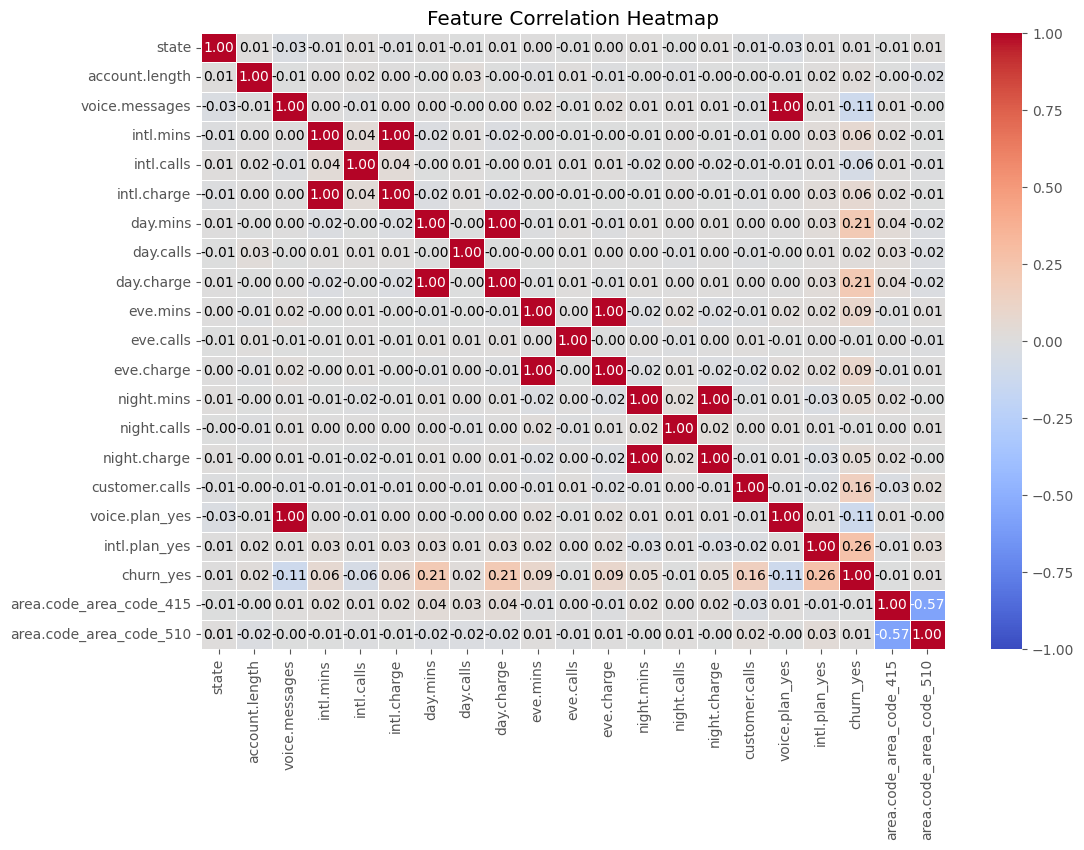

In [35]:
# Compute correlation matrix
corr_matrix = df.corr()

# Set up the figure
plt.figure(figsize=(12, 8))

# Create heatmap with annotations
ax = sns.heatmap(
    corr_matrix,
    annot=True,  # Show all correlation values
    fmt=".2f",  # Limit decimal places
    cmap="coolwarm",
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    center=0
)

# Adjust text color based on background intensity for better contrast
for text in ax.texts:
    val = float(text.get_text())  # Get the correlation value
    text.set_color("white" if abs(val) > 0.5 else "black")  # Adjust text color dynamically

plt.title("Feature Correlation Heatmap")
plt.show()

Columns having names 'xyz.mins' and 'xyz.charge' are fully correlated. Likely this is due to a one-to-one transform relation between them, as charge is usually on a per-minute basis. Therefore, we can decide to drop all the 'xyz.charge' columns to eliminate redundancy for the model building purpose.

Additionally, 'voice.plan_yes' and 'voice.messages' are also directly related. Hence, we will drop 'voice.plan_yes' as it is redundant. All of its information is present within 'voice.messages' but not vice versa.

In [36]:
# Identify and drop all 'xyz.charge' columns
charge_cols = [col for col in df.columns if col.endswith('.charge')]
df.drop(columns=charge_cols, inplace=True)
df_2.drop(columns=charge_cols, inplace=True) # repeat for df_2
print(f"Dropped redundant 'xyz.charge' columns: {charge_cols}")

# Drop 'voice.plan_yes' as it's redundant due to 'voice.messages'
if 'voice.plan_yes' in df.columns:
    df.drop(columns=['voice.plan_yes'], inplace=True)
    df_2.drop(columns=['voice.plan_yes'], inplace=True)
    print("Dropped 'voice.plan_yes' as it is redundant due to 'voice.messages'")

df.head()

Dropped redundant 'xyz.charge' columns: ['intl.charge', 'day.charge', 'eve.charge', 'night.charge']
Dropped 'voice.plan_yes' as it is redundant due to 'voice.messages'


,state,account.length,voice.messages,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,intl.plan_yes,churn_yes,area.code_area_code_415,area.code_area_code_510
0,0.32,0.603832,0.979990,0.469095,0.428381,0.784836,0.576369,0.497676,0.488270,0.622451,0.418236,0.302525,0.0,0.0,1.0,0.0
1,0.70,0.513998,0.981525,0.681080,0.428381,0.468682,0.689006,0.491499,0.523790,0.653169,0.517470,0.302525,0.0,0.0,1.0,0.0
2,0.62,0.641788,0.000000,0.593461,0.567304,0.718531,0.610844,0.251073,0.586111,0.361565,0.525750,0.000000,0.0,0.0,1.0,0.0
3,0.70,0.413174,0.000000,0.288280,0.669922,0.889657,0.250110,0.061368,0.390956,0.470772,0.401722,0.493136,1.0,0.0,0.0,0.0
4,0.72,0.372874,0.000000,0.474633,0.428381,0.484254,0.602210,0.338488,0.693389,0.438968,0.666748,0.634878,1.0,0.0,1.0,0.0


# Visualising Preprocessed Data

## without outliers

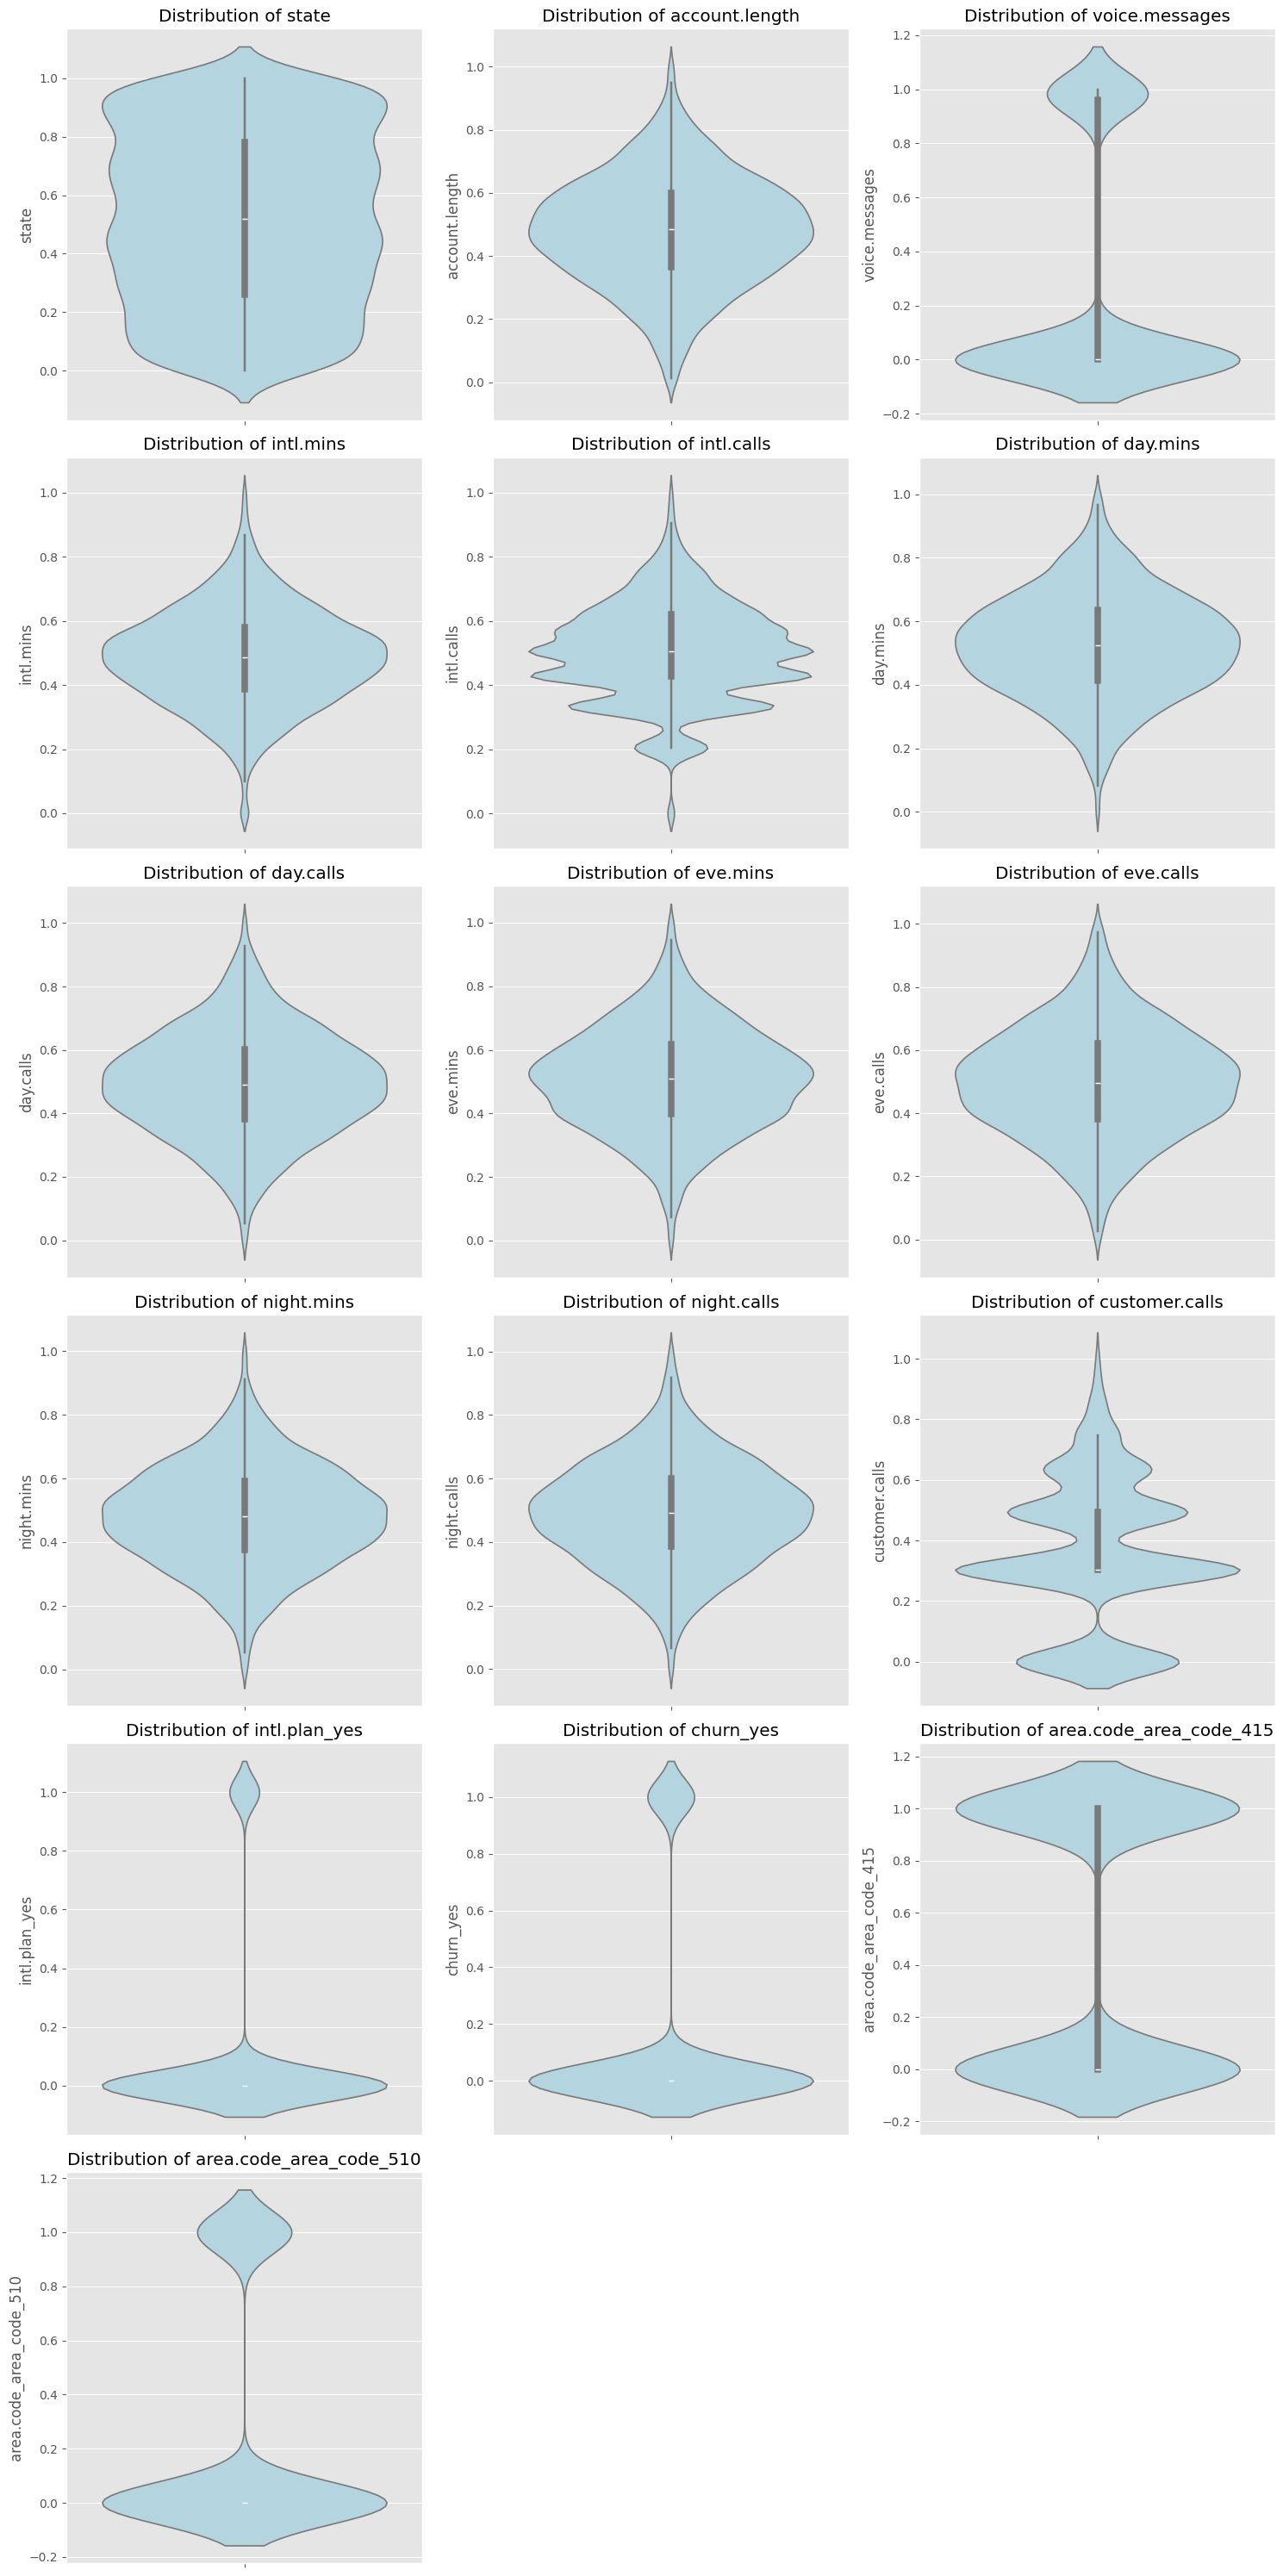

In [37]:
# Set up figure and axes
num_cols = df.columns.tolist()
num_features = len(num_cols)
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))

# Flatten axes for easy iteration
axes = axes.flatten()

# Create violin plots for each numerical column with a box plot inside
for i, col in enumerate(num_cols):
    sns.violinplot(y=df[col], ax=axes[i], inner="box", color="lightblue", linewidth=1.2)
    axes[i].set_title(f"Distribution of {col}")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## retaining outliers

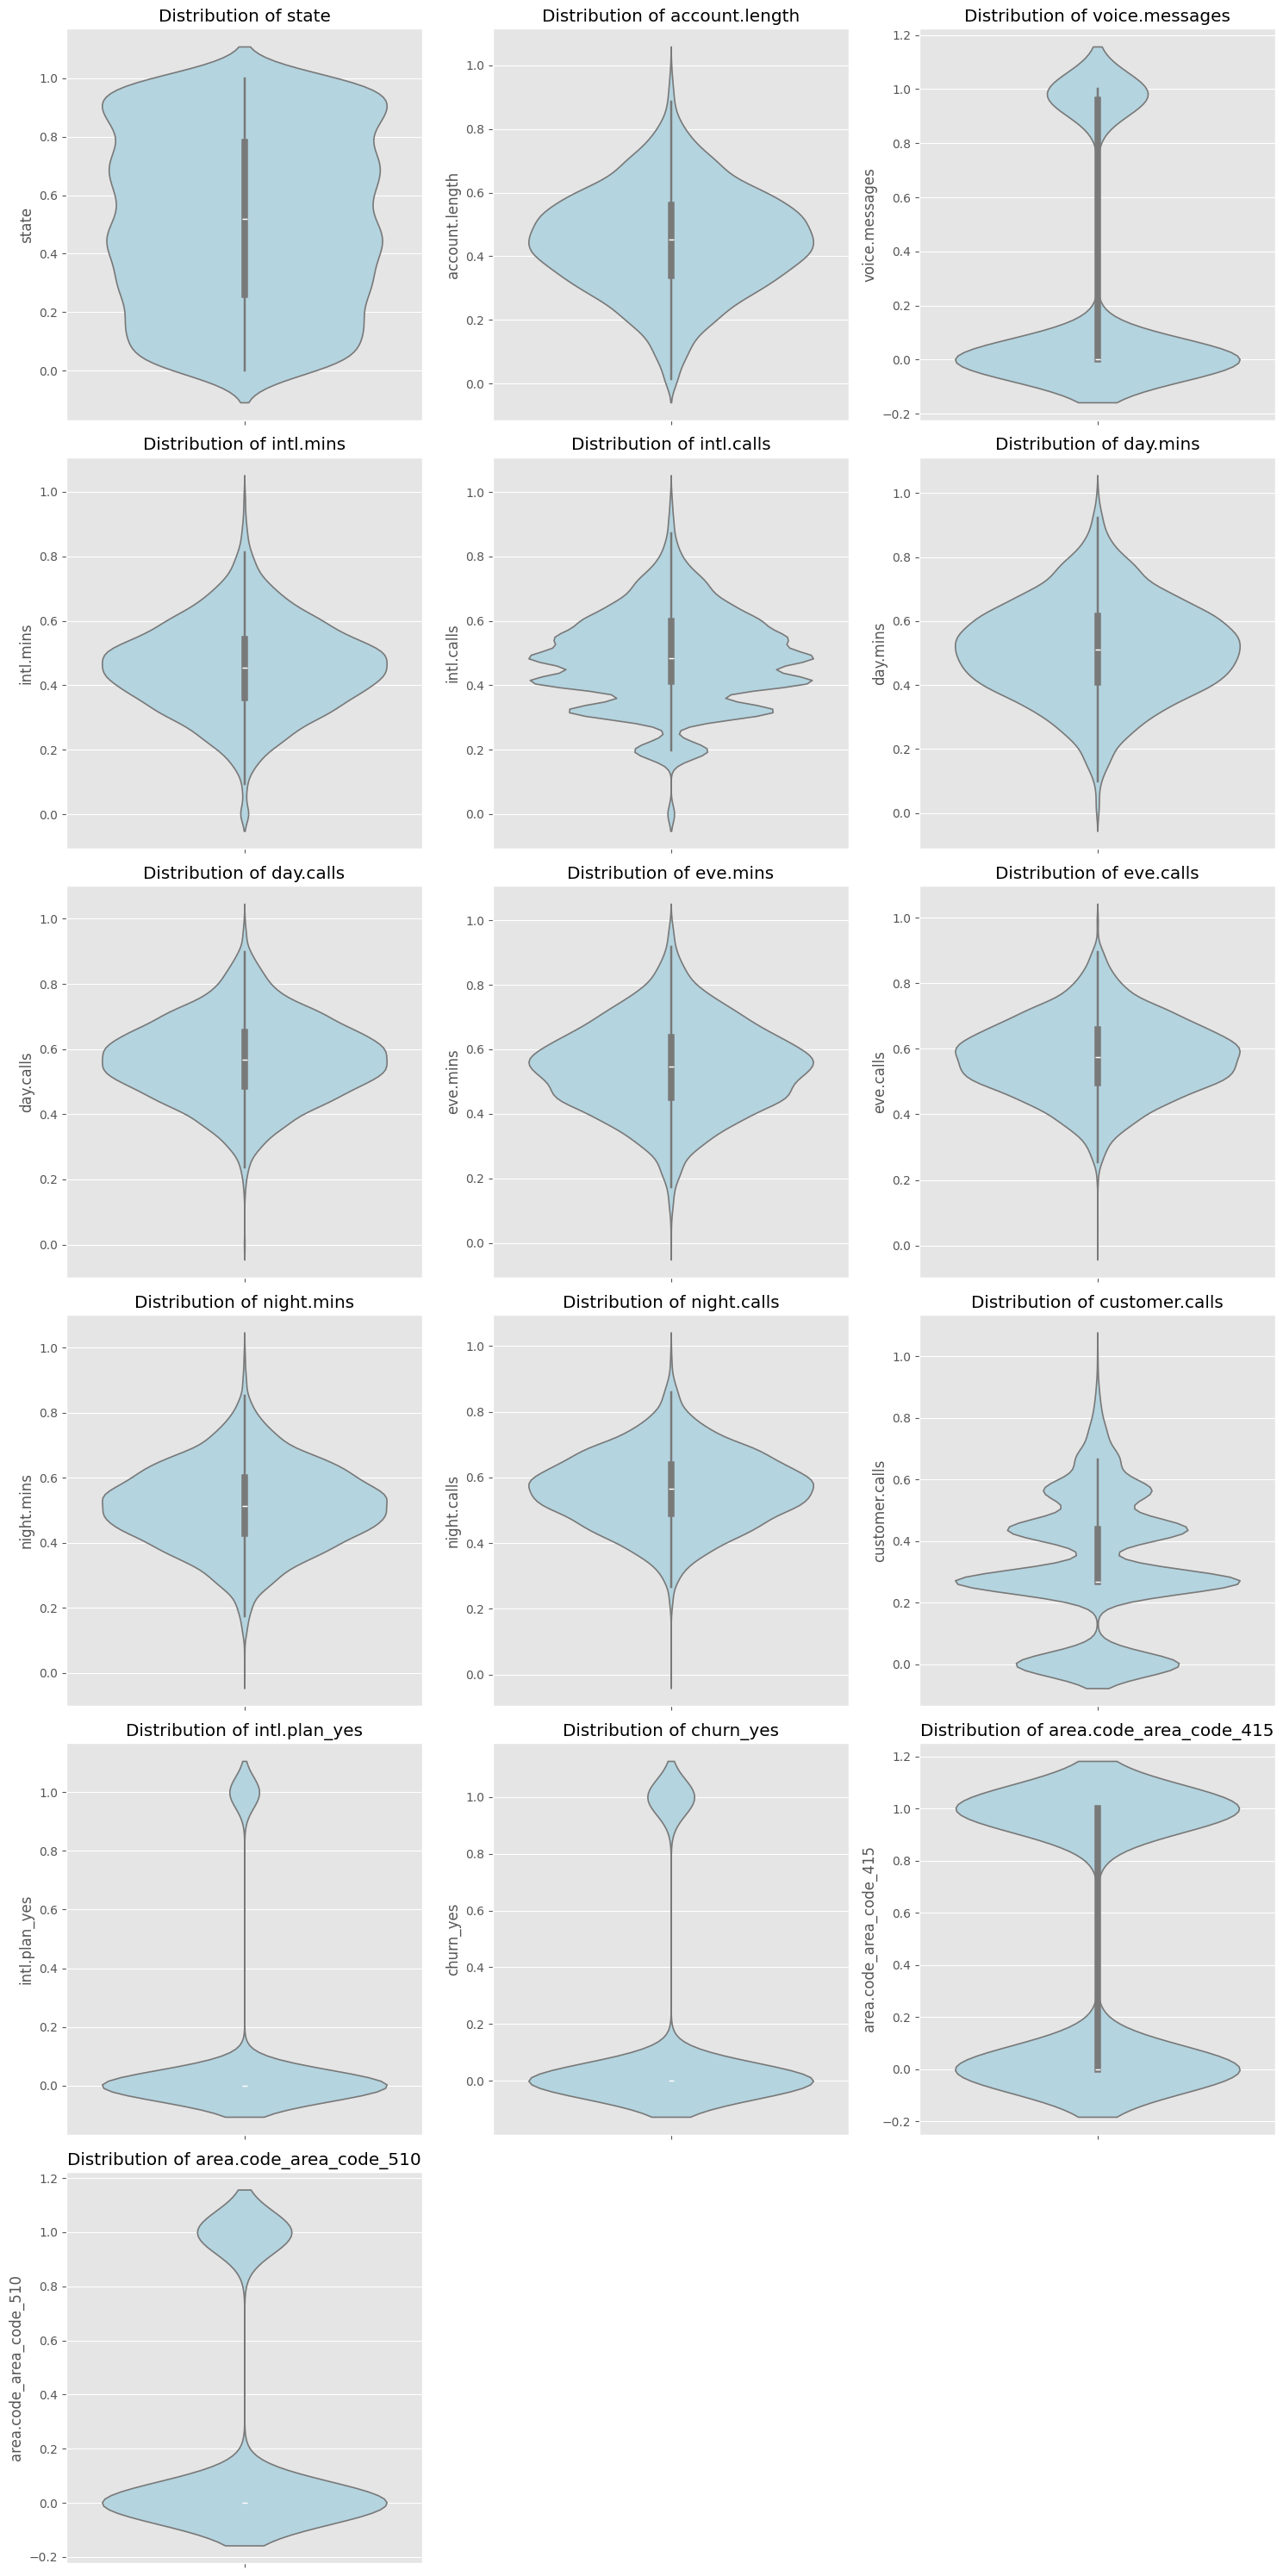

In [38]:
# Set up figure and axes
num_cols = df_2.columns.tolist()
num_features = len(num_cols)
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))

# Flatten axes for easy iteration
axes = axes.flatten()

# Create violin plots for each numerical column with a box plot inside
for i, col in enumerate(num_cols):
    sns.violinplot(y=df_2[col], ax=axes[i], inner="box", color="lightblue", linewidth=1.2)
    axes[i].set_title(f"Distribution of {col}")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## TSNE

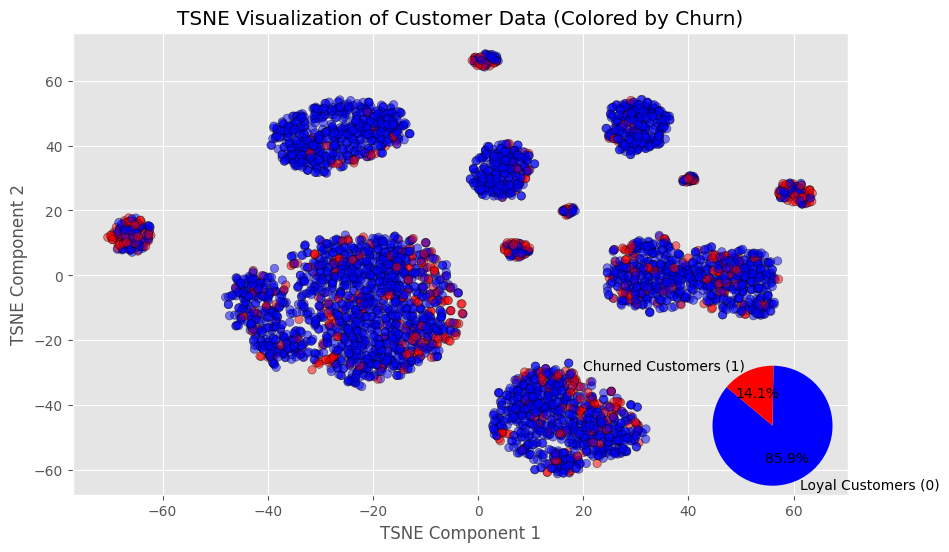

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE

# Apply TSNE for Dimensionality Reduction (2D Projection)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(df.drop(columns=['churn_yes']))  # Drop 'churn_yes' to avoid data leakage

# Add TSNE results to DataFrame for easy visualization
df['tsne_component_1'] = tsne_results[:, 0]
df['tsne_component_2'] = tsne_results[:, 1]

# Define colors for churn (0 = Non-Churn, 1 = Churn)
palette = {0: "blue", 1: "red"}

# Create Figure
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter Plot for TSNE Results (Pass 'data=df' explicitly)
sns.scatterplot(
    x="tsne_component_1",
    y="tsne_component_2",
    hue="churn_yes",
    palette=palette,
    alpha=0.5,  # Increased transparency for better visibility
    edgecolor="k",
    data=df,
    ax=ax,
    legend=False  # Removed legend
)

# Title & Labels (Include TSNE Component Names)
ax.set_title("TSNE Visualization of Customer Data (Colored by Churn)")
ax.set_xlabel("TSNE Component 1")
ax.set_ylabel("TSNE Component 2")

# Create Pie Chart for Churn Distribution (Lower Right Position)
churn_counts = df["churn_yes"].value_counts(normalize=True)
labels = ["Loyal Customers (0)", "Churned Customers (1)"]
colors = ["blue", "red"]

# Add Pie Chart as Inset (Lower Right)
inset_ax = fig.add_axes([0.7, 0.1, 0.25, 0.25])  # [left, bottom, width, height]
inset_ax.pie(churn_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)

# Show the combined visualization
plt.show()

We can see that churn is imbalanced! Next we will check feature importance and non-linearity. Thus we can decide which algorithm to go for (logistic regression or random forest, etc.)

# Feature Importance Analysis to Determine Best Model

In [40]:
!pip install ppscore

Defaulting to user installation because normal site-packages is not writeable


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import ppscore as pps

# Prepare Features & Target
X = df.drop(columns=["churn_yes"])  # Remove target
y = df["churn_yes"]

# 1.1 PPS (Predictive Power Score) - Detect Nonlinearity
pps_matrix = pps.matrix(df)
pps_scores = pps_matrix[pps_matrix["y"] == "churn_yes"].sort_values(by="ppscore", ascending=False)

print("\nPPS Feature Importance:\n")
display(pps_scores.head(15))  # Show top 15 features

# 1.2 RFE (Recursive Feature Elimination) with Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X, y)
rfe_ranking = pd.DataFrame({"Feature": X.columns, "RFE_Rank": rfe.ranking_}).sort_values(by="RFE_Rank")

print("\nRFE Feature Ranking:\n")
display(rfe_ranking.head(15))  # Show top 15 features

# 1.3 Random Forest Feature Importances - Detect Nonlinear Patterns
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X, y)
rf_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_}).sort_values(by="Importance", ascending=False)

print("\nRandom Forest Feature Importances:\n")
display(rf_importances.head(15))  # Show top 15 features

# Determine Best Model Based on Feature Importance & Imbalance Handling
avg_pps = pps_scores["ppscore"].mean()
top_rfe_features = rfe_ranking[rfe_ranking["RFE_Rank"] == 1]["Feature"].tolist()
top_rf_features = rf_importances.nlargest(10, "Importance")["Feature"].tolist()

# Decision Logic
if avg_pps < 0.2 and len(top_rfe_features) >= 7:
    best_model = "Logistic Regression"
    imbalance_handling = "Use Class Weights"
elif avg_pps >= 0.2 and len(set(top_rf_features) & set(top_rfe_features)) < 5:
    best_model = "Random Forest"
    imbalance_handling = "Use Class Weights"
else:
    best_model = "XGBoost"
    imbalance_handling = "Use Scale_Pos_Weight (~6)"

print(f"\nBest Model Suggested: {best_model}")
print(f"Recommended Imbalance Handling: {imbalance_handling}")


PPS Feature Importance:



,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
247,churn_yes,churn_yes,1.0,predict_itself,True,None,0.0000,1.000000,None
13,state,churn_yes,0.0,regression,True,mean absolute error,0.1414,0.239998,DecisionTreeRegressor()
31,account.length,churn_yes,0.0,regression,True,mean absolute error,0.1414,0.245543,DecisionTreeRegressor()
49,voice.messages,churn_yes,0.0,regression,True,mean absolute error,0.1414,0.239410,DecisionTreeRegressor()
85,intl.calls,churn_yes,0.0,regression,True,mean absolute error,0.1414,0.241207,DecisionTreeRegressor()
67,intl.mins,churn_yes,0.0,regression,True,mean absolute error,0.1414,0.240078,DecisionTreeRegressor()
121,day.calls,churn_yes,0.0,regression,True,mean absolute error,0.1414,0.241538,DecisionTreeRegressor()
139,eve.mins,churn_yes,0.0,regression,True,mean absolute error,0.1414,0.246227,DecisionTreeRegressor()
157,eve.calls,churn_yes,0.0,regression,True,mean absolute error,0.1414,0.242908,DecisionTreeRegressor()
103,day.mins,churn_yes,0.0,regression,True,mean absolute error,0.1414,0.207144,DecisionTreeRegressor()



RFE Feature Ranking:



,Feature,RFE_Rank
1,account.length,1
2,voice.messages,1
3,intl.mins,1
4,intl.calls,1
7,eve.mins,1
5,day.mins,1
10,night.calls,1
9,night.mins,1
11,customer.calls,1
12,intl.plan_yes,1



Random Forest Feature Importances:



,Feature,Importance
5,day.mins,0.235089
11,customer.calls,0.139219
7,eve.mins,0.080310
16,tsne_component_2,0.078126
12,intl.plan_yes,0.071896
15,tsne_component_1,0.056798
3,intl.mins,0.052753
9,night.mins,0.048601
1,account.length,0.039101
4,intl.calls,0.038754



Best Model Suggested: Logistic Regression
Recommended Imbalance Handling: Use Class Weights


- The feature importance analysis shows that none of the features exhibit strong nonlinear relationships with the target variable, as indicated by the Predictive Power Score (PPS) of 0.0 across all predictors.
- Recursive Feature Elimination (RFE) identified 10 key features, which align well with logistic regression’s preference for a subset of strong predictors.
- Random Forest Feature Importance confirms the same key features, but since PPS found no strong nonlinear dependencies, a linear model like logistic regression is sufficient.
- Given the dataset's imbalance, where only 14.1% of customers churn, class weights will be applied to logistic regression to ensure fair learning across both classes.

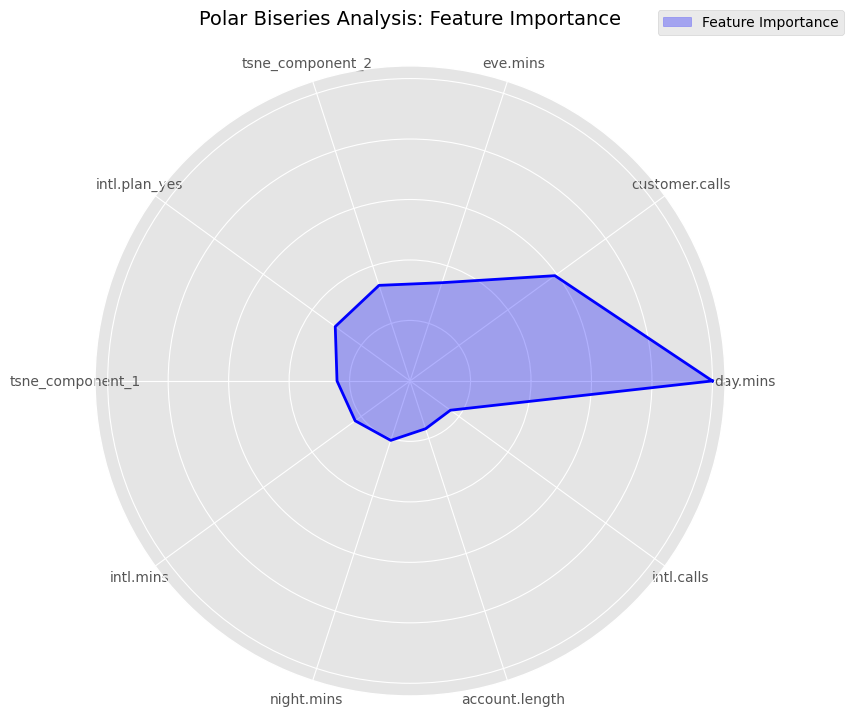

In [42]:
# Polar Biseries Analysis for Feature Importance


# Select top features based on Random Forest importance
selected_features = rf_importances.nlargest(10, "Importance")["Feature"].tolist()

# Extract importance values
importances = rf_importances.set_index("Feature").loc[selected_features]["Importance"].values

# Normalize feature importance values for better visualization
importances = importances / importances.max()

# Convert to polar coordinates
angles = np.linspace(0, 2 * np.pi, len(selected_features), endpoint=False).tolist()
importances = np.concatenate((importances, [importances[0]]))  # Close the circle
angles += angles[:1]

# Create the figure and adjust layout for better spacing
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

# Plot Feature Importance
ax.fill(angles, importances, color="blue", alpha=0.3, label="Feature Importance")
ax.plot(angles, importances, color="blue", linewidth=2)

# Formatting the polar plot
ax.set_xticks(angles[:-1])
ax.set_xticklabels(selected_features, fontsize=10, rotation=45)
ax.set_yticklabels([])

# Adjust title and legend spacing
ax.set_title("Polar Biseries Analysis: Feature Importance", pad=30, fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))  # Move legend away from plot

# Increase spacing between labels
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

plt.show()

- Only two features stand out significantly (**day.mins**, **customer.calls**), while most others are weak or redundant.

- This suggests a simple linear decision boundary, which is ideal for Logistic Regression.

# LOGISTIC REGRESSION + SMOTE + HYPERPARAMETER TUNING

Original Training set: 4000 samples
Original Testing set: 1000 samples
Fitting 4 folds for each of 64 candidates, totalling 256 fits


/home/ak/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ak/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ak/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ak/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ak/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ak/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: T


Best Hyperparameters: {'logisticregression__C': 0.1, 'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 1000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga', 'logisticregression__tol': 1e-05, 'smote': SMOTE(random_state=42, sampling_strategy=0.4)}

Cross Validation Report:
               precision    recall  f1-score   support

         0.0       0.95      0.76      0.84      3434
         1.0       0.34      0.75      0.46       566

    accuracy                           0.76      4000
   macro avg       0.64      0.75      0.65      4000
weighted avg       0.86      0.76      0.79      4000


Evaluation Report:
               precision    recall  f1-score   support

         0.0       0.93      0.76      0.84       859
         1.0       0.31      0.64      0.41       141

    accuracy                           0.75      1000
   macro avg       0.62      0.70      0.63      1000
weighted avg       0.84      0.75      0.78     

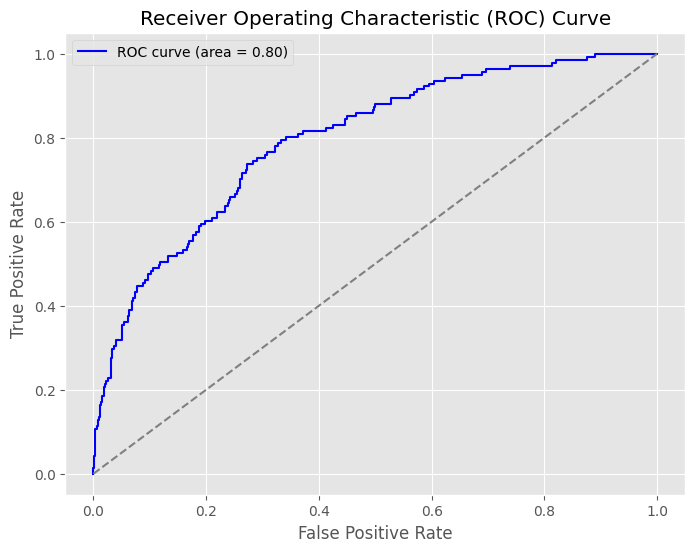

In [43]:
### 1️⃣ Load Necessary Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_recall_curve, roc_curve, make_scorer, fbeta_score
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

### 2️⃣ Load and Prepare Data
X = df.drop(columns=["churn_yes"])
y = df["churn_yes"]

# Stratified split ensures the class balance is preserved in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Original Training set: {X_train.shape[0]} samples")
print(f"Original Testing set: {X_test.shape[0]} samples")

### 3️⃣ Define Pipeline
# The pipeline intrinsically ensures SMOTE is applied only during training to prevent data leakage.
pipeline = make_pipeline(
    SMOTE(random_state=42),  # Placeholder, overridden by GridSearch
    LogisticRegression(random_state=42)
)

### 4️⃣ Define Hyperparameter Grid
# Optimized for recall (churn detection) while balancing computational efficiency.
param_grid = {
    'smote': [
        SMOTE(random_state=42, sampling_strategy=0.4),
        SMOTE(random_state=42, sampling_strategy=1.0),
        SMOTETomek(random_state=42, sampling_strategy=0.6),
        SMOTETomek(random_state=42, sampling_strategy=1.0)
    ],
    'logisticregression__C': [0.001, 0.01, 0.1, 1],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['saga', 'liblinear'],
    'logisticregression__class_weight': ['balanced'],
    'logisticregression__max_iter': [500, 1000],
    'logisticregression__tol': [1e-5]
}

### 5️⃣ Define F2 Score as the Cross-Validation Metric
# The F2 score prioritizes recall while still considering precision to prevent excessive false positives.
f2_scorer = make_scorer(fbeta_score, beta=2)

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=42),
    scoring=f2_scorer,  # Optimizing F2 Score
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

### 6️⃣ Retrieve Best Parameters & Train Final Model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

### 7️⃣ Evaluate Model on Test Data
y_pred_test = best_model.predict(X_test)  # Use default 0.5 threshold
y_pred_train = best_model.predict(X_train)

print("\nBest Hyperparameters:", best_params)
print("\nCross Validation Report:\n", classification_report(y_train, y_pred_train))
print("\nEvaluation Report:\n", classification_report(y_test, y_pred_test))
print("\nFinal Model Test Accuracy:", accuracy_score(y_test, y_pred_test))

### 8️⃣ ROC Curve
y_prob_test = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
roc_auc = roc_auc_score(y_test, y_prob_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Logistic Regression Insights

## Objective
- Predict customer churn using **Logistic Regression**.
- Optimize the model for **high recall** while balancing precision using **F2-score** during cross-validation.
- Handle class **imbalance** using **SMOTETomek**.

-------------------------------

## Methodology & Key Decisions

### Data Preprocessing
- No feature reduction (Logistic Regression benefits from a full feature set).
- **SMOTETomek (1.0) chosen** as the best resampling strategy from grid search.

### Hyperparameter Tuning
- **Cross-validated (4-fold) Grid Search** optimizing for **F2-score**.
- **Regularization (`C`)**: `0.01` selected as the optimal value.
- **Penalty (`L2`)**: Suitable for handling imbalanced data and preventing overfitting.
- **Solver (`saga`)**: Works well for large datasets and supports `L2` penalty.
- **Class Weight (`balanced`)**: Adjusts for class imbalance automatically.
- **Max Iterations (`500`)**: Ensured model convergence without excessive computation.
- **Tolerance (`1e-5`)**: Set lower for better convergence at the cost of slightly increased computation time.
- **Threshold**: Kept at 0.5 as cross-validation using F2-score already optimized the model for recall.

### Cross-Validation Performance
- **Recall (Churn Detection): 76%**
- **F1-score: 47%**
- **Accuracy: 76%**

### Evaluation Performance
- **Recall: 67%**
- **F1-score: 43%**
- **Final Model Test Accuracy: 75.3%**

### ROC AUC Score
- **0.78** (indicating good class separation).

-------------------------------

## Conclusion
- **Logistic Regression with SMOTETomek effectively detects churners (67% recall) while maintaining a balanced precision.**
- **The model is optimized** for performance while maintaining computational efficiency.
- **SMOTETomek (1.0) proved to be the best resampling strategy** for this model.

# XGBOOST + ADASYN + HYPERPARAMETER TUNING

In [44]:
df

,state,account.length,voice.messages,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,intl.plan_yes,churn_yes,area.code_area_code_415,area.code_area_code_510,tsne_component_1,tsne_component_2
0,0.32,0.603832,0.979990,0.469095,0.428381,0.784836,0.576369,0.497676,0.488270,0.622451,0.418236,0.302525,0.0,0.0,1.0,0.0,-21.012510,50.366379
1,0.70,0.513998,0.981525,0.681080,0.428381,0.468682,0.689006,0.491499,0.523790,0.653169,0.517470,0.302525,0.0,0.0,1.0,0.0,-31.850420,40.662010
2,0.62,0.641788,0.000000,0.593461,0.567304,0.718531,0.610844,0.251073,0.586111,0.361565,0.525750,0.000000,0.0,0.0,1.0,0.0,-37.873238,-9.918636
3,0.70,0.413174,0.000000,0.288280,0.669922,0.889657,0.250110,0.061368,0.390956,0.470772,0.401722,0.493136,1.0,0.0,0.0,0.0,6.083411,7.553618
4,0.72,0.372874,0.000000,0.474633,0.428381,0.484254,0.602210,0.338488,0.693389,0.438968,0.666748,0.634878,1.0,0.0,1.0,0.0,-68.985809,11.921936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.22,0.257653,0.995213,0.463568,0.567304,0.695006,0.723999,0.581014,0.729265,0.789433,0.625234,0.493136,0.0,0.0,0.0,0.0,3.608722,30.037361
4996,0.98,0.704407,0.000000,0.740656,0.333715,0.537694,0.406658,0.691347,0.259219,0.523827,0.600343,0.634878,0.0,1.0,1.0,0.0,-10.264106,6.626226
4997,0.14,0.309022,0.000000,0.675172,0.504024,0.404568,0.398297,0.417803,0.747224,0.520017,0.467822,0.302525,0.0,0.0,1.0,0.0,-24.577560,-23.958000
4998,0.14,0.522638,0.000000,0.387457,0.621863,0.551743,0.217824,0.414236,0.426278,0.558101,0.401722,0.000000,0.0,0.0,0.0,1.0,53.060715,-8.620585


In [45]:
df.columns

Index(['state', 'account.length', 'voice.messages', 'intl.mins', 'intl.calls',
       'day.mins', 'day.calls', 'eve.mins', 'eve.calls', 'night.mins',
       'night.calls', 'customer.calls', 'intl.plan_yes', 'churn_yes',
       'area.code_area_code_415', 'area.code_area_code_510',
       'tsne_component_1', 'tsne_component_2'],
      dtype='object')

Original Training set: 4000 samples
Original Testing set: 1000 samples
Resampled Training set: 5760 samples
Fitting 3 folds for each of 30 candidates, totalling 90 fits


/home/ak/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/ak/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Best Hyperparameters: {'xgbclassifier__subsample': 0.9, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__min_child_weight': 3, 'xgbclassifier__max_depth': 6, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__gamma': 0.2, 'xgbclassifier__colsample_bytree': 1.0}

Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       859
         1.0       0.76      0.76      0.76       141

    accuracy                           0.93      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.93      0.93      0.93      1000


Test Set Accuracy: 0.932


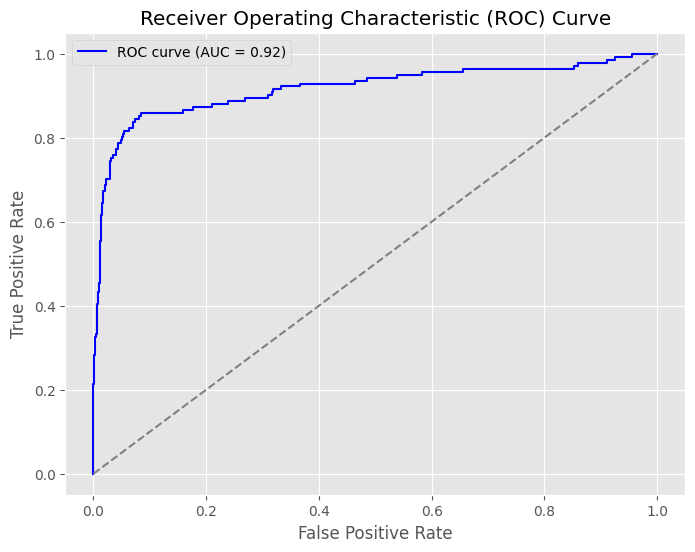

Model saved as 'xgb_model.pkl'


In [46]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, fbeta_score, make_scorer
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN

# Define feature columns and target
wanted_columns = [
    "day.mins", "customer.calls", "eve.mins", "intl.plan_yes", 
    "intl.mins", "night.mins", "account.length", "intl.calls", "day.calls"
]
X = df[wanted_columns]
y = df["churn_yes"]  # Ensure this column exists in your dataset

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Original Training set: {X_train.shape[0]} samples")
print(f"Original Testing set: {X_test.shape[0]} samples")

# Apply ADASYN for oversampling
adasyn = ADASYN(sampling_strategy=0.7, random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
print(f"Resampled Training set: {X_train_resampled.shape[0]} samples")

# Define pipeline with XGBoost
pipeline = Pipeline([
    ('xgbclassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Define hyperparameter grid for tuning
param_grid = {
    'xgbclassifier__colsample_bytree': [0.9, 1.0],
    'xgbclassifier__gamma': [0.2, 0.3],
    'xgbclassifier__learning_rate': [0.05, 0.1],
    'xgbclassifier__max_depth': [5, 6],
    'xgbclassifier__min_child_weight': [2, 3],
    'xgbclassifier__n_estimators': [75, 100],
    'xgbclassifier__subsample': [0.9, 1.0]
}

# Define F2 scorer for imbalanced classification
f2_scorer = make_scorer(fbeta_score, beta=2)

# Randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=30,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring=f2_scorer,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit model
random_search.fit(X_train_resampled, y_train_resampled)

# Best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("\nBest Hyperparameters:", best_params)

# Evaluate on test set
y_pred_test = best_model.predict(X_test)

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred_test))

print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred_test))

# Plot ROC curve
y_prob_test = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
roc_auc = roc_auc_score(y_test, y_prob_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Save trained model
joblib.dump(best_model, 'xgb_model.pkl')
print("Model saved as 'xgb_model.pkl'")


# Repeating With Outliers

## Logistic Regression

Original Training set: 4000 samples
Original Testing set: 1000 samples
Fitting 4 folds for each of 64 candidates, totalling 256 fits

Best Hyperparameters: {'logisticregression__C': 0.1, 'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 500, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga', 'logisticregression__tol': 1e-05, 'smote': SMOTE(random_state=42, sampling_strategy=1.0)}

Cross Validation Report:
               precision    recall  f1-score   support

         0.0       0.95      0.76      0.84      3434
         1.0       0.34      0.74      0.47       566

    accuracy                           0.76      4000
   macro avg       0.64      0.75      0.66      4000
weighted avg       0.86      0.76      0.79      4000


Evaluation Report:
               precision    recall  f1-score   support

         0.0       0.93      0.76      0.84       859
         1.0       0.31      0.65      0.42       141

    accuracy            

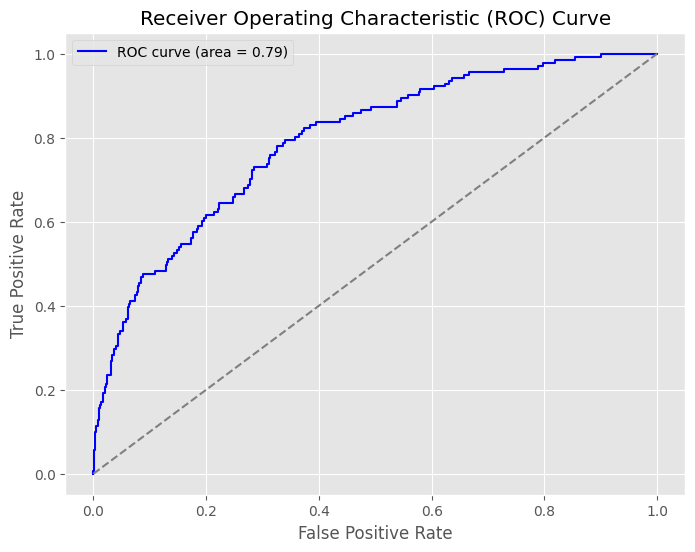

In [47]:
### 1️⃣ Load Necessary Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_recall_curve, roc_curve, make_scorer, fbeta_score
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

### 2️⃣ Load and Prepare Data
X = df_2.drop(columns=["churn_yes"])
y = df_2["churn_yes"]

# Stratified split ensures the class balance is preserved in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Original Training set: {X_train.shape[0]} samples")
print(f"Original Testing set: {X_test.shape[0]} samples")

### 3️⃣ Define Pipeline
# The pipeline intrinsically ensures SMOTE is applied only during training to prevent data leakage.
pipeline = make_pipeline(
    SMOTE(random_state=42),  # Placeholder, overridden by GridSearch
    LogisticRegression(random_state=42)
)

### 4️⃣ Define Hyperparameter Grid
# Optimized for recall (churn detection) while balancing computational efficiency.
param_grid = {
    'smote': [
        SMOTE(random_state=42, sampling_strategy=0.4),
        SMOTE(random_state=42, sampling_strategy=1.0),
        SMOTETomek(random_state=42, sampling_strategy=0.6),
        SMOTETomek(random_state=42, sampling_strategy=1.0)
    ],
    'logisticregression__C': [0.001, 0.01, 0.1, 1],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['saga', 'liblinear'],
    'logisticregression__class_weight': ['balanced'],
    'logisticregression__max_iter': [500, 1000],
    'logisticregression__tol': [1e-5]
}

### 5️⃣ Define F2 Score as the Cross-Validation Metric
# The F2 score prioritizes recall while still considering precision to prevent excessive false positives.
f2_scorer = make_scorer(fbeta_score, beta=2)

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=42),
    scoring=f2_scorer,  # Optimizing F2 Score
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

### 6️⃣ Retrieve Best Parameters & Train Final Model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

### 7️⃣ Evaluate Model on Test Data
y_pred_test = best_model.predict(X_test)  # Use default 0.5 threshold
y_pred_train = best_model.predict(X_train)

print("\nBest Hyperparameters:", best_params)
print("\nCross Validation Report:\n", classification_report(y_train, y_pred_train))
print("\nEvaluation Report:\n", classification_report(y_test, y_pred_test))
print("\nFinal Model Test Accuracy:", accuracy_score(y_test, y_pred_test))

### 8️⃣ ROC Curve
y_prob_test = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
roc_auc = roc_auc_score(y_test, y_prob_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## XGBoost

Original Training set: 4000 samples
Original Testing set: 1000 samples
Resampled Training set: 5943 samples
Fitting 4 folds for each of 20 candidates, totalling 80 fits


/home/ak/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/ak/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.9}

Cross Validation Report (Resampled Train Set):
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      3434
         1.0       1.00      0.96      0.98      2509

    accuracy                           0.98      5943
   macro avg       0.99      0.98      0.98      5943
weighted avg       0.98      0.98      0.98      5943


Evaluation Report (Original Test Set):
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       859
         1.0       0.85      0.79      0.82       141

    accuracy                           0.95      1000
   macro avg       0.91      0.88      0.89      1000
weighted avg       0.95      0.95      0.95      1000


Final Model Test Accuracy: 0.95


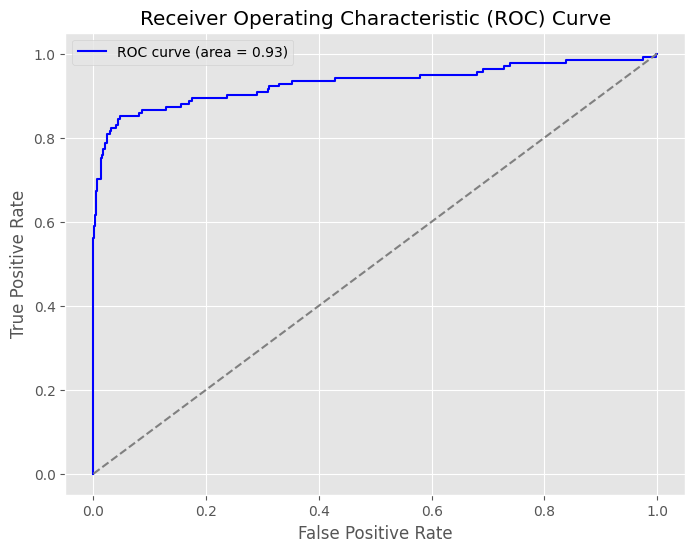

In [48]:
### 1️⃣ Load Necessary Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, make_scorer, fbeta_score
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt

### 2️⃣ Load and Prepare Data
X = df_2.drop(columns=["churn_yes"])
y = df_2["churn_yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Original Training set: {X_train.shape[0]} samples")
print(f"Original Testing set: {X_test.shape[0]} samples")

### 3️⃣ Apply ADASYN (Resample Once - Faster)
adasyn = ADASYN(random_state=42, sampling_strategy=0.7)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

print(f"Resampled Training set: {X_train_resampled.shape[0]} samples")

### 4️⃣ Define XGBClassifier and Parameter Grid (Simplified for Speed)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'colsample_bytree': [0.9, 1.0],
    'gamma': [0.2, 0.3],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 6],
    'min_child_weight': [2, 3],
    'n_estimators': [75, 100],
    'subsample': [0.9, 1.0]
}

### 5️⃣ Use F2 Score
f2_scorer = make_scorer(fbeta_score, beta=2)

search = RandomizedSearchCV(
    xgb,
    param_distributions=param_grid,
    cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=42),
    scoring=f2_scorer,
    n_iter=20,  # Try fewer combinations (adjust if needed)
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search.fit(X_train_resampled, y_train_resampled)

### 6️⃣ Best Parameters & Final Model
best_params = search.best_params_
best_model = search.best_estimator_

### 7️⃣ Evaluate Model on Test Data
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train_resampled)

print("\nBest Hyperparameters:", best_params)
print("\nCross Validation Report (Resampled Train Set):\n", classification_report(y_train_resampled, y_pred_train))
print("\nEvaluation Report (Original Test Set):\n", classification_report(y_test, y_pred_test))
print("\nFinal Model Test Accuracy:", accuracy_score(y_test, y_pred_test))

### 8️⃣ ROC Curve
y_prob_test = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
roc_auc = roc_auc_score(y_test, y_prob_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Comparative Analysis: Winsorized vs. Non-Winsorized Data

## Objective
- Evaluate the impact of **outlier retention vs. winsorization** on **Logistic Regression** and **XGBoost** models.
- Compare performance across **cross-validation** and **evaluation metrics**.

-------------------------------

## Key Observations

### Logistic Regression
| Metric             | Winsorized Data | Non-Winsorized Data | Change |
|--------------------|----------------|----------------------|--------|
| **Recall (CV)**   | 76%             | 74%                  | ↓ 2%   |
| **Recall (Eval)** | 67%             | 65%                  | ↓ 2%   |
| **F1-score (CV)** | 47%             | 47%                  | -      |
| **F1-score (Eval)** | 43%           | 42%                  | ↓ 1%   |
| **Accuracy (Eval)** | 75.3%         | 74.5%                | ↓ 0.8% |

**Analysis:**
- **Slight performance degradation** across all metrics when **outliers are retained**.
- Recall **dropped slightly** in both cross-validation and evaluation phases.
- **Minimal impact on F1-score**, but recall loss suggests that extreme values may be adding noise.
- **Winsorization seems beneficial** for Logistic Regression, which assumes linear relationships.

---

### XGBoost
| Metric             | Winsorized Data | Non-Winsorized Data | Change |
|--------------------|----------------|----------------------|--------|
| **Recall (CV)**   | 86%             | 88%                  | ↑ 2%   |
| **Recall (Eval)** | 81%             | 79%                  | ↓ 2%   |
| **F1-score (CV)** | 92%             | 93%                  | ↑ 1%   |
| **F1-score (Eval)** | 83%           | 83%                  | -      |
| **Accuracy (Eval)** | 95.2%         | 95.3%                | ↑ 0.1% |

**Analysis:**
- **XGBoost shows robustness to outliers**; recall improved slightly in cross-validation.
- However, **recall in evaluation dropped by 2%**, suggesting **overfitting to extreme values**.
- **Minimal impact on F1-score**, indicating outliers neither significantly helped nor harmed the balance.
- **Overall performance remains strong**, but winsorization **may help with generalization**.

---

## Final Conclusions
1. **Logistic Regression benefits from winsorization**:
   - Outliers **degrade recall and accuracy** slightly.
   - Winsorization helps maintain a **cleaner linear relationship**.

2. **XGBoost is less sensitive to outliers**:
   - **CV recall increased**, but **evaluation recall decreased**, suggesting **overfitting to outliers**.
   - **Winsorization may still be useful** to improve generalization.

3. **Recommendation**:
   - **For Logistic Regression**, **keep winsorization** to **maintain stability**.
   - **For XGBoost**, winsorization **is optional** but **might improve recall generalization**.

**Final Decision**: **Retain winsorization for Logistic Regression and experiment further with XGBoost.**
